### Importing the required libraries


In [202]:
import tensorflow
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix

### Loading the dataset

In [203]:

dataset =pd.read_csv('/Users/surajkumarjha/Downloads/data.csv')
dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


### Data pre-processing is being carried out here..

In [204]:
dataset.head()



,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [205]:
# Replacing M with 1 and B with 0....
dataset['diagnosis'] = dataset['diagnosis'].apply(lambda x : 1 if x=='M' else 0 )

In [206]:
# Removing the unwanted features from the dataset...

final_dataset=dataset.drop('id',axis=1)
final_dataset = final_dataset.drop('Unnamed: 32', axis=1)
final_dataset




,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [207]:
# Checking NA values
final_dataset.isna().sum()



diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [208]:
final_dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Selection of  dependent and independent variable

In [209]:
# y: 'Dependent variable' whreas x:'Independent variable'
y = final_dataset.diagnosis
x = final_dataset.iloc[:,1:]


### Data splitting ( splitting data into train and test split  )

In [210]:
# taking the test size as 15 % of dataset 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state= 101, shuffle = True)



### Creating CNN Network

In [211]:
# Using sequential model from Keras
model = Sequential()
# Adding input layer with 30 neurons with 30 input dimensions i.e equal to number of x features
model.add(Dense(30, input_dim=30, activation='relu'))
# Adding hidden layer with 15 neurons 
model.add(Dense(15, activation='relu'))
# Adding output layer with 1 neuron
model.add(Dense(1, activation='sigmoid'))


Note: Here our prediction column has two categories M and B so it is binary classification problem and for binary classification problem sigmoid is best activation function. It returns either 0 or 1.

In [212]:
import keras.backend as K
def f1_score(y_true, y_pred):

    # Count positive samples.
    c1 = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    c2 = K.sum(K.round(K.clip(y_pred, 0, 1)))
    c3 = K.sum(K.round(K.clip(y_true, 0, 1)))

    # If there are no true samples, fix the F1 score at 0.
    if c3 == 0:
        return 0

    # How many selected items are relevant?
    precision = c1 / c2

    # How many relevant items are selected?
    recall = c1 / c3

    # Calculate f1_score
    f1_score = 2 * (precision * recall) / (precision + recall)
    return f1_score

In [213]:

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',f1_score])

Note: There are many optimizers, loss functions and matrices but, i am using binary_crossentropy beacuse it is a binary classification problem and accuracy as a matrix due to classification problem. 

In [218]:
# Training the model with epocs = 40
history = model.fit(x_train, y_train, epochs=36)

Train on 483 samples
Epoch 1/36
483/483 [==============================] - 0s 222us/sample - loss: 0.2450 - acc: 0.9130 - f1_score: 0.8605
Epoch 2/36
483/483 [==============================] - 0s 163us/sample - loss: 0.2217 - acc: 0.9193 - f1_score: 0.9004
Epoch 3/36
483/483 [==============================] - 0s 182us/sample - loss: 0.2247 - acc: 0.9151 - f1_score: 0.8816
Epoch 4/36
483/483 [==============================] - 0s 197us/sample - loss: 0.2062 - acc: 0.9296 - f1_score: 0.9063
Epoch 5/36
483/483 [==============================] - 0s 187us/sample - loss: 0.2397 - acc: 0.9172 - f1_score: 0.8800
Epoch 6/36
483/483 [==============================] - 0s 179us/sample - loss: 0.2052 - acc: 0.9193 - f1_score: 0.8795
Epoch 7/36
483/483 [==============================] - 0s 159us/sample - loss: 0.2243 - acc: 0.9193 - f1_score: 0.8885
Epoch 8/36
483/483 [==============================] - 0s 161us/sample - loss: 0.1979 - acc: 0.9255 - f1_score: 0.9033
Epoch 9/36
483/483 [===============

In [219]:
# Testing the model 
p = model.predict(x_test)

In [220]:
# Creating unseen data array to predict
new = [[12.013, 0.32, 43.78, 0.124, 54.97, 0.23, 3.75, 64.35, 12.642, 0.032, 87.232, 32.76, 65.97, 23.087, 45.23, 89.02, 99.54, 45.34, 0.23, 0.54, 53.53, 12.65, 76.76, 121.09, 43.001, 12.54, 64.34, 19.076, 143.02, 75.01, ]]
len(new[0])

30

In [221]:
# Predicting the result for given unseen data.
result = model.predict(np.array(new))

In [222]:
if result[0][0] == 0.0:
    print("B")
else:
    print("M")

M


In [223]:
# Checking for train accuracy
train_loss,train_accuracy,train_f1score = model.evaluate(x_train,y_train)
print(train_accuracy, train_loss, train_f1score)

483/483 [==============================] - 1s 2ms/sample - loss: 0.2446 - acc: 0.9172 - f1_score: 0.9037
0.9171843 0.24458344553753456 0.9036682


In [224]:
# Checking for test accuracy
test_loss,test_accuracy, test_f1score = model.evaluate(x_test,y_test)
print(test_accuracy, test_loss, test_f1score)

86/86 [==============================] - 0s 153us/sample - loss: 0.2810 - acc: 0.8953 - f1_score: 0.8777
0.89534885 0.28102324244587923 0.877732


In [225]:
# Difference between train and test accuracy
accuracy_difference = train_accuracy - test_accuracy
print(accuracy_difference)

0.021835446


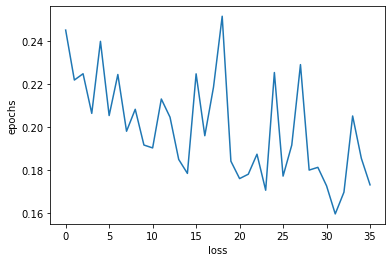

In [226]:
# Plotting the loss vs epocs graph
loss_values = history.history['loss']
plt.plot(loss_values)
plt.xlabel('loss')
plt.ylabel('epochs')
plt.show()


In [234]:
abs(train_loss-test_loss)

0.036439796908344674